In [1]:
# Find the number of samples having missing values
print(data.isnull().any(axis = 1).sum())

#TASK 2
# Fill Missing Values (continuous -> mean, categorical -> mode)
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].fillna(data[col].mode()[0])
  else:
    data[col].fillna(data[col].mean())


# Remove the duplicated sample from the dataset
# Identifying duplicates
print(data.duplicated().sum())
#Removing duplicates
data = data.drop_duplicates()
print(data.duplicated().sum())


# Map all the categorical data to ordinal data.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_cols = ['gender', 'smoking_history']
for col in categorical_cols:
  data[col] = encoder.fit_transform(data[col])

print(data[['gender','smoking_history']].head())


# Normalize blood_glucose_level
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['blood_glucose_level'] = scaler.fit_transform(data[['blood_glucose_level']])
print(data['blood_glucose_level'].head())


# Prediction for new input
new_input = np.array([[60, 1, 30.5, 1, 0, 0, 6.5, 155]])
new_input_df = pd.DataFrame([new_input[0]], columns=X_multi.columns)
y_new_pred = np.round(multi_model.predict(new_input_df))
print("Prediction for new input:", y_new_pred)


In [19]:
# LOGISTIC REGRESSION

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Manually create DataFrame
data = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 23, 56, 48],
    'Salary': [45000, 50000, 80000, 110000, 95000, 48000, 120000, 100000],
    'Purchased': [0, 0, 1, 1, 1, 0, 1, 1]
})

# data = pd.read_csv('data.csv')  
# X = data.drop('Purchased', axis=1)   drop target in X
# y = data['Purchased']

# Features and target
x = data[['Age', 'Salary']]
y = data['Purchased']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

# Create and train model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)

print("Predicted:", y_pred)
print("Actual:", list(y_test))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

# Predictions for new data
new_samples = pd.DataFrame([
    {'Age': 30, 'Salary': 60000},
    {'Age': 50, 'Salary': 115000}
])

# OR
# new_samples = pd.DataFrame({
#     'Age': [30, 50],
#     'Salary': [60000,115000]
# })


new_pred=model.predict(new_samples)
print("\nNew Prediction for new sample data: ",new_pred)


Predicted: [0 0]
Actual: [0, 0]
Accuracy: 100.0

New Prediction for new sample data:  [0 1]


In [97]:
# KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler

data=pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 23, 56, 48, 30, 35],
    'Salary': [45000, 50000, 80000, 110000, 95000, 48000, 120000, 100000, 60000, 65000],
    'Experience': [1, 2, 20, 25, 18, 1, 30, 22, 5, 7],
    'EducationLevel': [1, 1, 3, 3, 3, 2, 4, 3, 2, 2],  # 1=HighSchool, 2=Bachelor, 3=Master, 4=PhD
    'Dependents': [0, 1, 2, 3, 2, 0, 4, 2, 1, 1],
    'RegionCode': [101, 102, 103, 101, 102, 103, 104, 101, 102, 104],  # Just some region codes
    'Purchased': [0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
})

x=data.drop('Purchased',axis=1)
y=data['Purchased']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=KNeighborsClassifier(n_neighbors=4,weights='uniform',algorithm='auto')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("Predicted: ",y_pred)
print("Actual: ",list(y_test))
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

# Predict on new data
new_samples = pd.DataFrame([
    {'Age': 28, 'Salary': 52000, 'Experience': 3, 'EducationLevel': 2, 'Dependents': 1, 'RegionCode': 102},
    {'Age': 50, 'Salary': 105000, 'Experience': 23, 'EducationLevel': 3, 'Dependents': 2, 'RegionCode': 101}
])

new_predictions = model.predict(new_samples)
print("\nNew Predictions for Sample Data:", new_predictions)

# ---------------------------------------------------------
# # Step 4: Feature scaling   StandardScaler normalizes features
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# # Step 5: Train KNN
# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(x_train_scaled, y_train)

# # Step 6: Predict & evaluate
# y_pred = model.predict(x_test_scaled)


Predicted:  [1 1 1]
Actual:  [0, 0, 0]
Accuracy:  0.0

New Predictions for Sample Data: [1 1]


Regression Line: 4.15x+39.40
R2 score: 0.74
Mean Squared Error: 6.58
Mean Absolute Error: 2.25


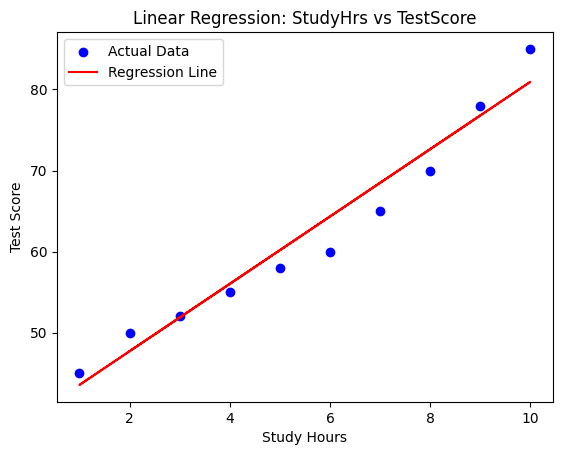

New Data: 
    Study_hours
0          1.5
1          5.5
2         11.0
Predicted Test Scores:
[45.63461538 62.25       85.09615385]


In [6]:
# LINEAR REGRESSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

data=pd.DataFrame({
    'Study_hours': [2, 4, 6, 8, 10, 1, 3, 5, 7, 9],
    'Test_score': [50, 55, 60, 70, 85, 45, 52, 58, 65, 78]
})

x=data[['Study_hours']]
y=data['Test_score']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

# Get Regression Line
m=model.coef_[0]
c=model.intercept_
print(f"Regression Line: {m:.2f}x+{c:.2f}")

# Accuracy is only r2 score for regressions
r2 = r2_score(y_test,y_pred)
print(f"R2 score: {r2:.2f}")

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Plotting
plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(x,model.predict(x),color='red', label='Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title("Linear Regression: StudyHrs vs TestScore")
plt.legend()
plt.show()

# Predict for new study hour values
new_data = pd.DataFrame({'Study_hours': [1.5, 5.5, 11]})
new_predictions = model.predict(new_data)

print("New Data: \n",new_data)
print("Predicted Test Scores:")
print(new_predictions)


Regression Equation: Test_score = 1.08*x1 + 0.75*x2 + 0.87
R2 Score: 0.9278719979500699
Mean Squared Error: 5.8423681660443405
Mean Absolute Error: 1.7739928285171906


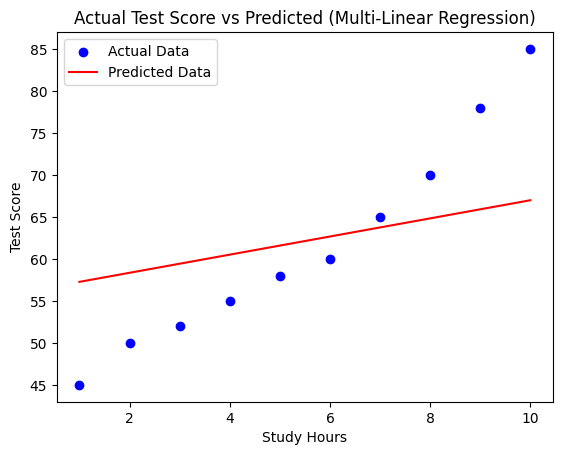

New Input Data:
   Study_hours  Attendance
0          2.0          65
1          6.5          80
2         10.0          95
Predicted Test Scores:
[51.62159882 67.69320818 82.68508753]


In [8]:
# MULTI-LINEAR REGRESSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample dataset with 2 features (multi-features)
data = pd.DataFrame({
    'Study_hours':    [2, 4, 6, 8, 10, 1, 3, 5, 7, 9],
    'Attendance':     [60, 70, 75, 80, 95, 55, 65, 72, 78, 90],
    'Test_score':     [50, 55, 60, 70, 85, 45, 52, 58, 65, 78]
})

x = data[['Study_hours', 'Attendance']]
y = data['Test_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Coefficients
coef = model.coef_        # Array of coefficients
intercept = model.intercept_

print(f"Regression Equation: Test_score = {coef[0]:.2f}*x1 + {coef[1]:.2f}*x2 + {intercept:.2f}")

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


# Prepare predicted values for plotting
avg_attendance = data['Attendance'].mean()
study_range = np.linspace(data['Study_hours'].min(), data['Study_hours'].max(), 100)
x_pred = pd.DataFrame({
    'Study_hours': study_range,
    'Attendance': [avg_attendance] * 100
})
y_predicted = model.predict(x_pred)

# Plot
plt.scatter(data['Study_hours'], data['Test_score'], color='blue', label='Actual Data')
plt.plot(study_range, y_predicted, color='red', label='Predicted Data')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.title('Actual Test Score vs Predicted (Multi-Linear Regression)')
plt.legend()
plt.show()


# Predict for new data
new_data = pd.DataFrame({
    'Study_hours': [2, 6.5, 10],
    'Attendance': [65, 80, 95]
})

new_predictions = model.predict(new_data)

print("New Input Data:")
print(new_data)
print("Predicted Test Scores:")
print(new_predictions)



mse:  47844161.515721574
mae:  5881.147540983606
accuracy 0.9770228543567191
m:  10020.491803278686
c:  16209.016393442624
[141803.27868852  31352.45901639]
   Actual      Predicted
8  150000  141803.278689
1   40000   31352.459016


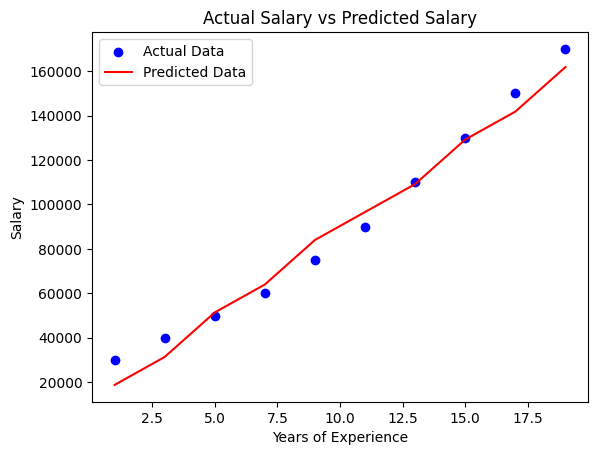

In [12]:
# MULTI-LINEAR  ARVIND

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = ({
    "YearsExperience": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    "Certifications": [1, 2, 2, 3, 3, 4, 5, 5, 6, 6],
    "Salary": [30000, 40000, 50000, 60000, 75000, 90000, 110000, 130000, 150000, 170000]
})

df=pd.DataFrame(data)
x=df[["YearsExperience","Certifications"]]
y=df["Salary"]

#Preprocess Dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Train the model
model=LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x)

#Calculate error and accuracy
mse=mean_squared_error(y,y_predicted)
mae=mean_absolute_error(y,y_predicted)
accuracy=r2_score(y,y_predicted)
print("mse: ",mse)
print("mae: ",mae)
print("accuracy",accuracy)


#Printing Regression Line
m=model.coef_[0]
c=model.intercept_
print("m: ",m)
print("c: ",c)


#Test the model
tested_x=model.predict(x_test)
print(tested_x)

compared_df = pd.DataFrame({'Actual':y_test, 'Predicted':tested_x})
print(compared_df)

plt.scatter(df['YearsExperience'],df['Salary'],color='blue',label='Actual Data')
plt.plot(x['YearsExperience'],y_predicted,color='red',label='Predicted Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual Salary vs Predicted Salary')
plt.legend()
plt.show()



Predicted:  [1 0 0]
Actual:  [0, 0, 0]
Accuracy:  66.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

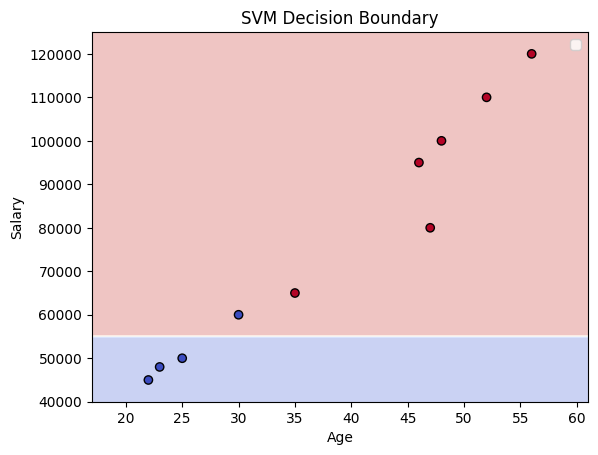

In [77]:
# SVM_AKB

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
data = pd.DataFrame({
    'Age': [22, 25, 47, 52, 46, 23, 56, 48, 30, 35],
    'Salary': [45000, 50000, 80000, 110000, 95000, 48000, 120000, 100000, 60000, 65000],
    'Purchased': [0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
})

# Features and target
x = data[['Age', 'Salary']]
y = data['Purchased']

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create and train the model
model = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
model.fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Evaluation
print("Predicted: ", y_pred)
print("Actual: ", list(y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a grid of values
x_vals = np.linspace(x['Age'].min()-5, x['Age'].max()+5, 100)
y_vals = np.linspace(x['Salary'].min()-5000, x['Salary'].max()+5000, 100)
xx, yy = np.meshgrid(x_vals, y_vals)
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on grid
Z = model.predict(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x['Age'], x['Salary'], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


(150, 2)


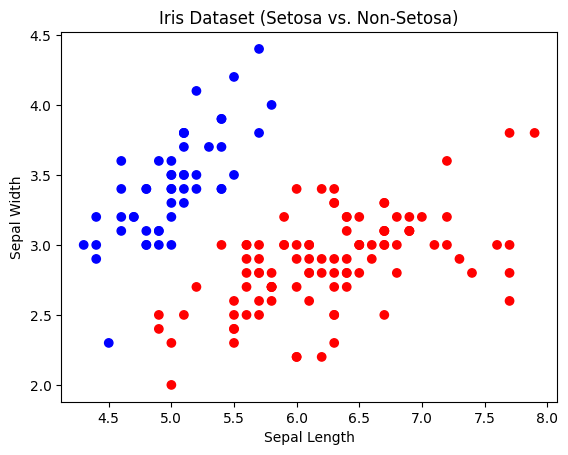

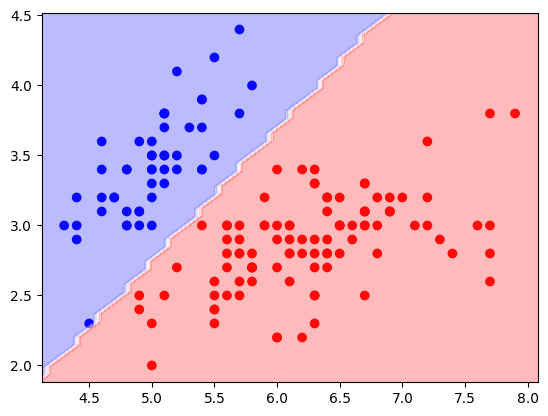

Accuracy: 1.0
[-1]


In [88]:
# SVM prev
import numpy as np;
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)
print(X.shape)

# plot of org points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, clf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## new_samples = np.array([4.9, 3])
predictions = clf.predict(np.array([[4.9, 3]]))
print(predictions)

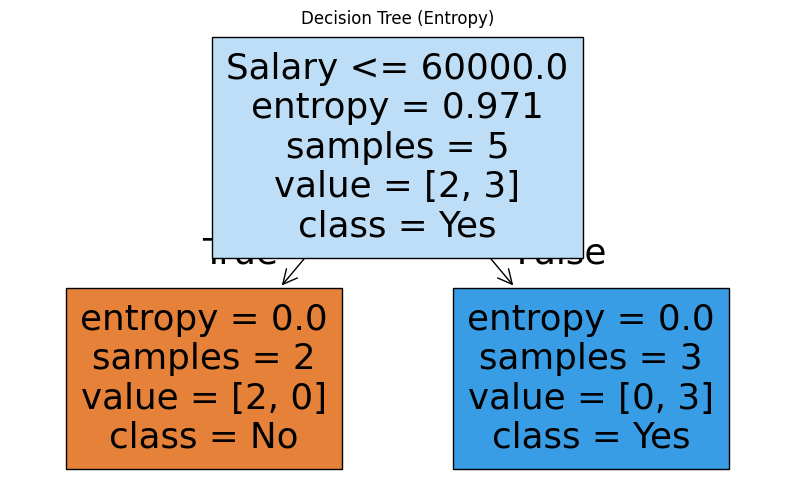

In [94]:
# DECISION TREE akb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample dataset
data = pd.DataFrame({
    'Age': [25, 30, 47, 52, 23, 43, 36, 50],
    'Salary': [50000, 60000, 80000, 110000, 45000, 85000, 70000, 105000],
    'Purchased': [0, 0, 1, 1, 0, 1, 1, 1]
})

# Features and Target
x = data[['Age', 'Salary']]
y = data['Purchased']

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Model with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(x_train, y_train)

# Plot the tree
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['Age', 'Salary'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()


[Text(0.5, 0.75, 'x[1] <= 65000.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

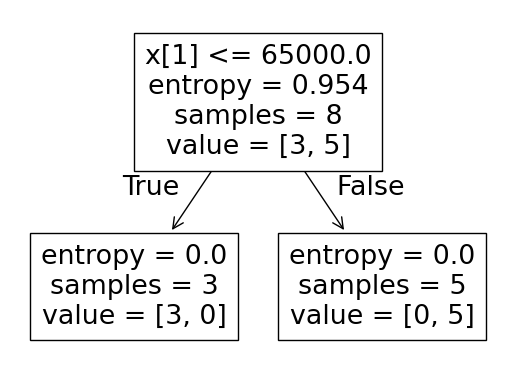

In [96]:
# DECISION TREE cls

import pandas as pd
from sklearn import tree

data = pd.DataFrame({
    'Age': [25, 30, 47, 52, 23, 43, 36, 50],
    'Salary': [50000, 60000, 80000, 110000, 45000, 85000, 70000, 105000],
    'Purchased': [0, 0, 1, 1, 0, 1, 1, 1]
})

x = data[['Age', 'Salary']]
y = data['Purchased']

clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x,y)
tree.plot_tree(clf)


# ---------------------IRIS DATASET
# from sklearn.datasets import load_iris
# from sklearn import tree

# iris = load_iris()
# X, y = iris.data, iris.target
# clf = tree.DecisionTreeClassifier(criterion='entropy')
# clf = clf.fit(X, y)

# print(iris.data.shape)
# print(iris.target)
# print(iris.feature_names)
# print(iris.target_names)
# tree.plot_tree(clf)
